# Lab 2
-------------------------------------------------------------
Author: Kevin Paganini    
Date: 12.6.2022     
Description: This notebook revolves around Exploratory Data Analysis and Visualization.    


### Imports and setup

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
sys.path.append('../')
from helper_functions import make_pretty

pd.set_option('display.max_rows', 250)



sacramento_real_estate_path = os.path.join('Data','cleaned_sac_data.csv')

### Loading the data

In [54]:
sac_df = pd.read_csv(sacramento_real_estate_path)
sac_df.drop(['Unnamed: 0'], inplace=True, axis=1)
sac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street       984 non-null    object 
 1   city         984 non-null    object 
 2   zip          984 non-null    int64  
 3   state        984 non-null    object 
 4   beds         984 non-null    int64  
 5   baths        984 non-null    int64  
 6   sq__ft       984 non-null    int64  
 7   type         984 non-null    object 
 8   sale_date    984 non-null    object 
 9   price        984 non-null    int64  
 10  latitude     984 non-null    float64
 11  longitude    984 non-null    float64
 12  empty_lot    984 non-null    bool   
 13  street_type  976 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 101.0+ KB


In [55]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR


### Part 1: Regression on Price   


In part I, you are going to explore which variables are predictive of the price (serving as dependent variable).  
 
a. For each continuous variable, create a scatter plot of the continuous variable versus 
price.  Make sure to put the independent variable on the horizontal axis and the 
dependent variable on the vertical axis. 

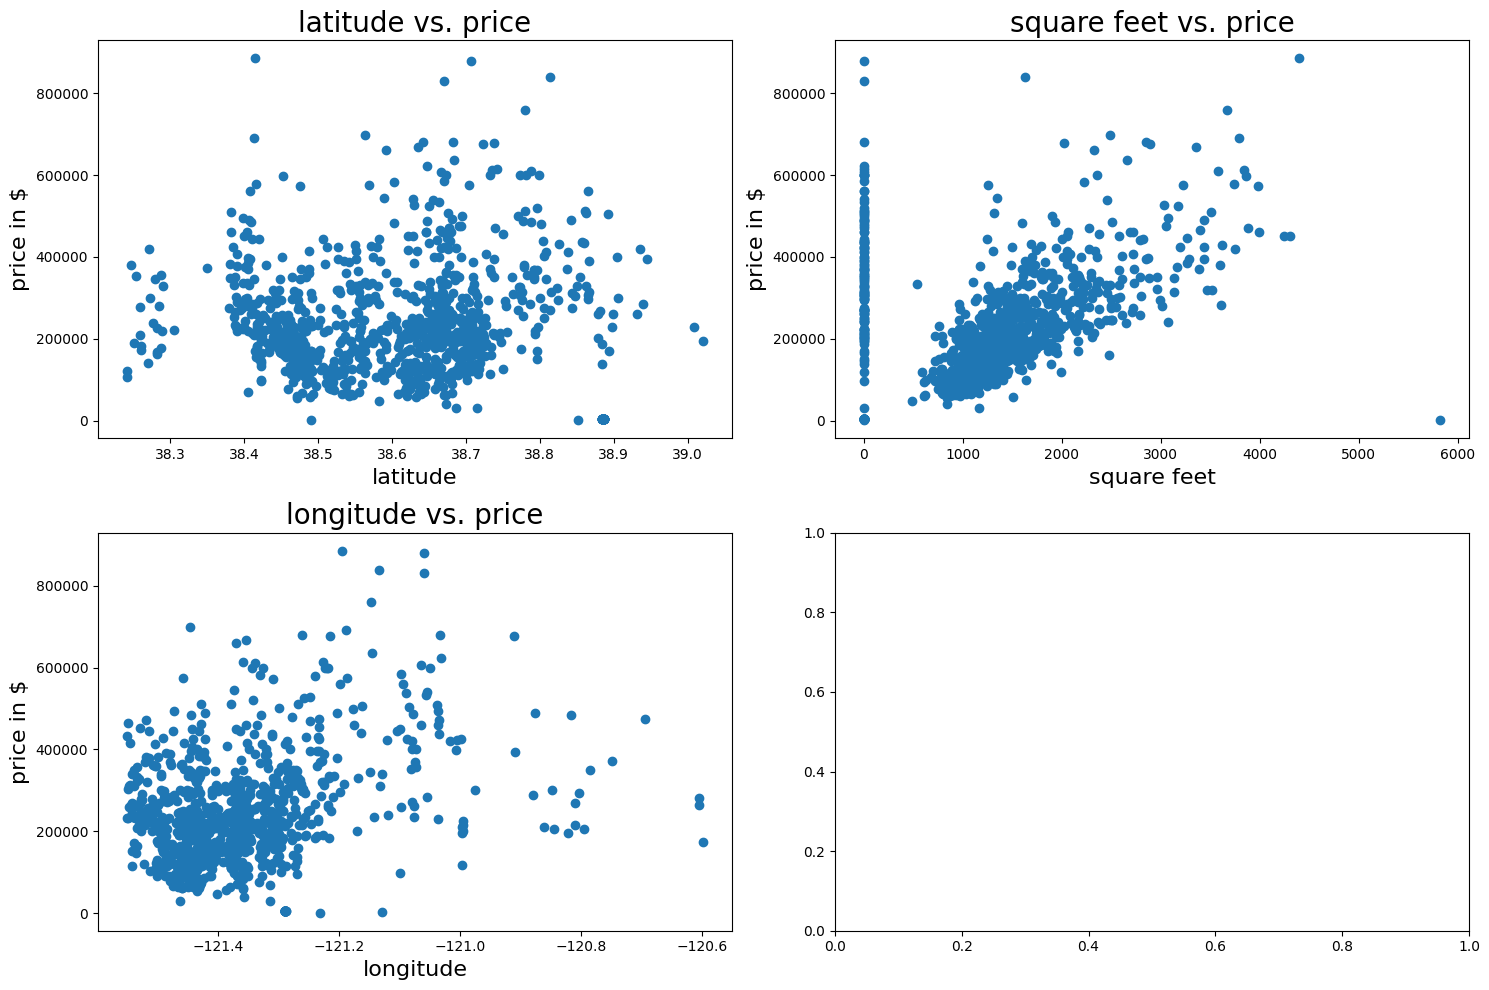

In [56]:
fig, ax = plt.subplots(figsize=(15, 10),nrows=2, ncols=2)
ax[0, 0].scatter(sac_df['latitude'], sac_df['price'])
ax[1, 0].scatter(sac_df['longitude'], sac_df['price'])
ax[0, 1].scatter(sac_df['sq__ft'], sac_df['price'])

make_pretty(ax[0, 0], 'latitude vs. price', 'latitude', 'price in $')
make_pretty(ax[1, 0], 'longitude vs. price', 'longitude', 'price in $')
make_pretty(ax[0, 1], 'square feet vs. price', 'square feet', 'price in $')
plt.tight_layout()

b. A predictive continuous independent variable will correlate with the output variable. Create a table in which you list describe each continuous independent variable as predictive or not.

| Variable  |Predictiveness |
|-----------|:-------------:|
| latitude  |     3         |
| longitude |     2         |
| sq__ft    |     1         |

3 is the lowest predictiveness and 1 is the highest.    
 
Latitude has little to no predictiveness. We can see this because there is no relationship between the input (latitude) and output (price), in other words it is very difficult to draw a line or deduce a pattern from the scatter plot. Longitude has slightly more predictiveness than latitude, however it also has very little correlation with the target variable. Square feet has a lot more correlation with the target variable than the other two. One can see that generally, if a house has more square feet, it will cost more as well. Thi also lines up with real world expectations. 

c. For each categorical variable, create a box plot of the categorical variable versus price.  
Make sure to put the independent variable on the horizontal axis and the dependent 
variable on the vertical axis.

<AxesSubplot: title={'center': 'Price distribution across city'}, xlabel='city', ylabel='price'>

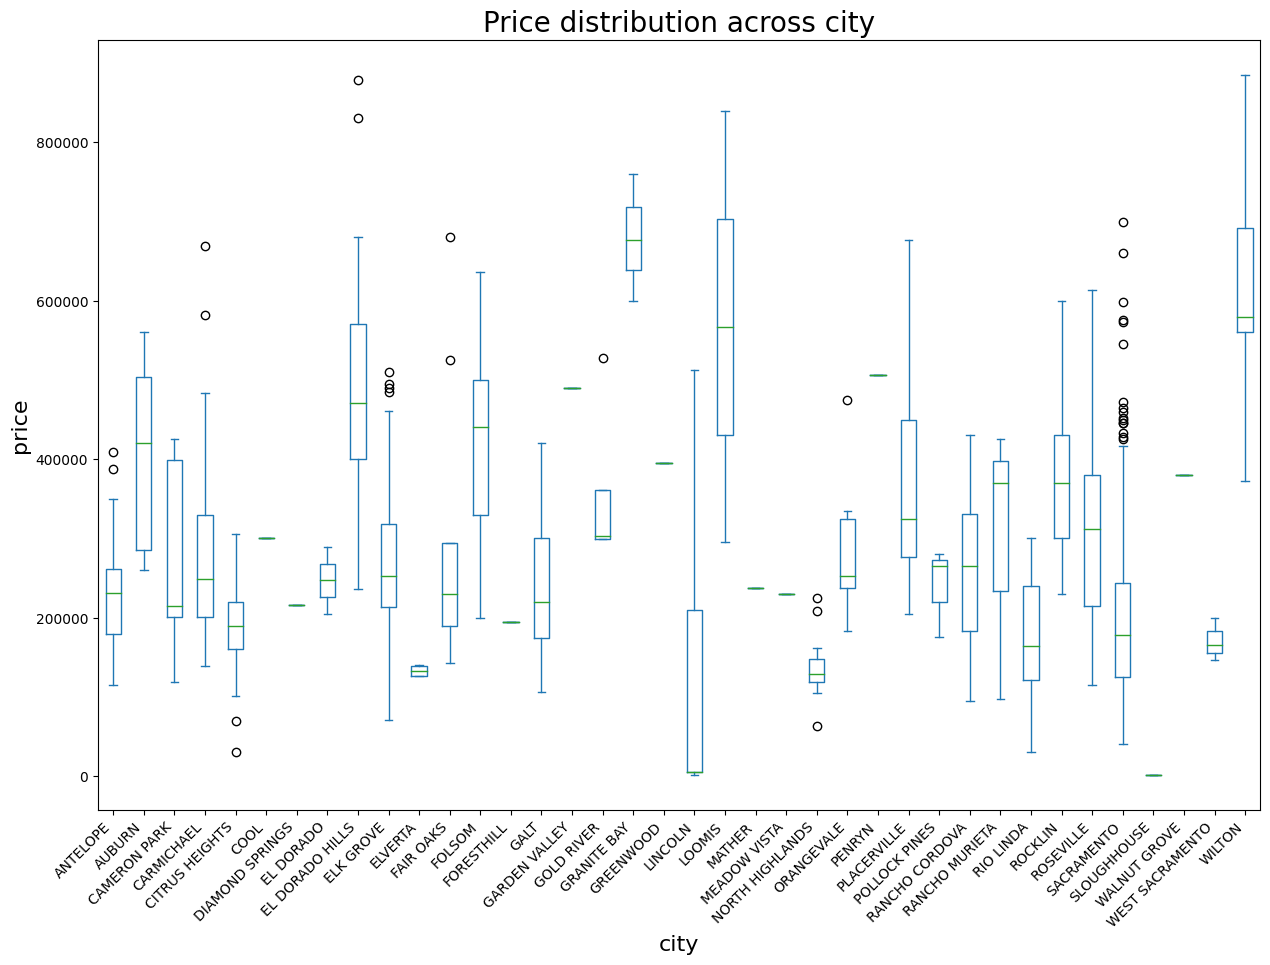

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
def make_box_plot_price(col, ax):
    
    sac_df.plot(kind='box', column='price', by=col, ax=ax)
    # the output it was giving was very annoying so put a anonymous value
    _ =ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    make_pretty(ax, f'Price distribution across {col}', col, 'price')
    return ax
make_box_plot_price('city', ax)

<AxesSubplot: title={'center': 'Price distribution across state'}, xlabel='state', ylabel='price'>

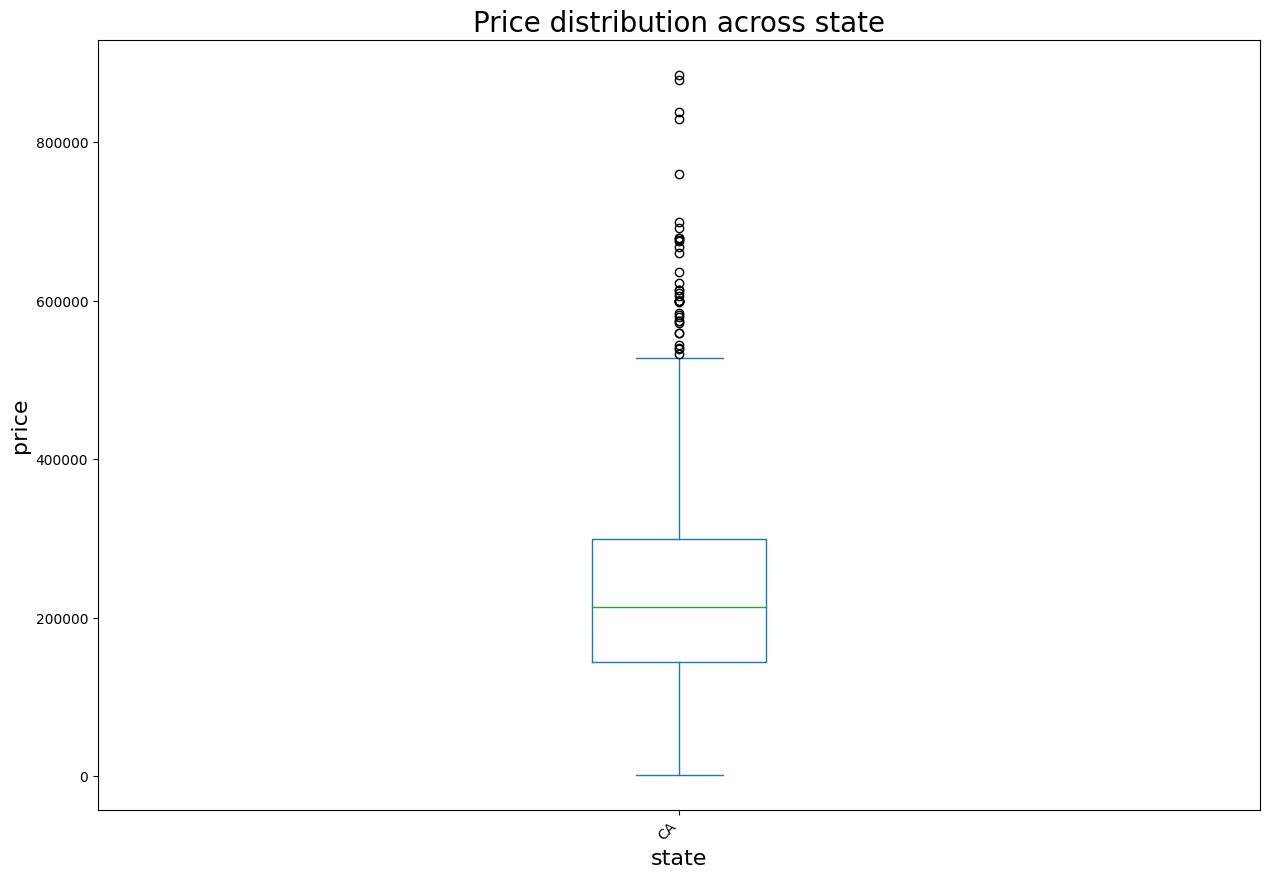

In [58]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('state', ax)

<AxesSubplot: title={'center': 'Price distribution across zip'}, xlabel='zip', ylabel='price'>

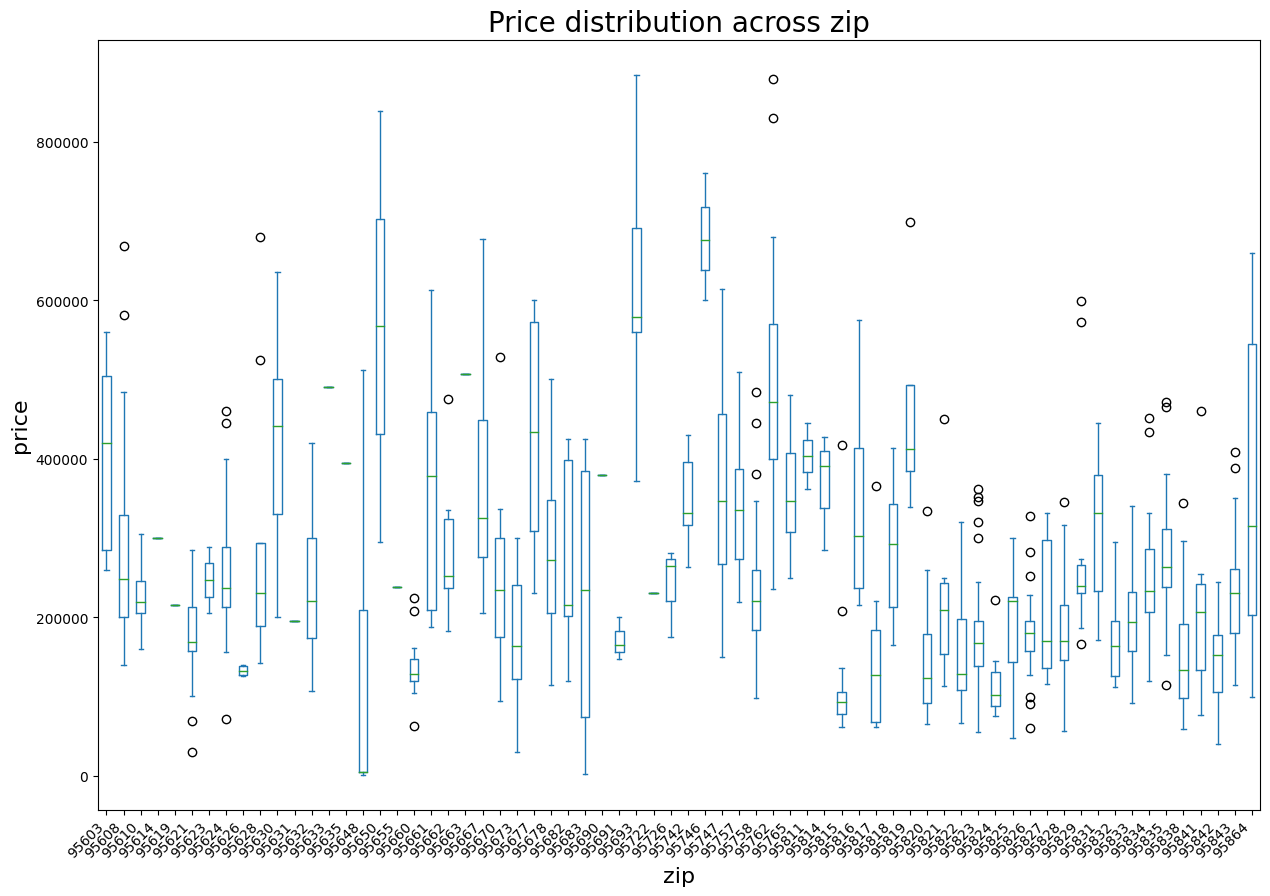

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('zip', ax)

<AxesSubplot: title={'center': 'Price distribution across beds'}, xlabel='beds', ylabel='price'>

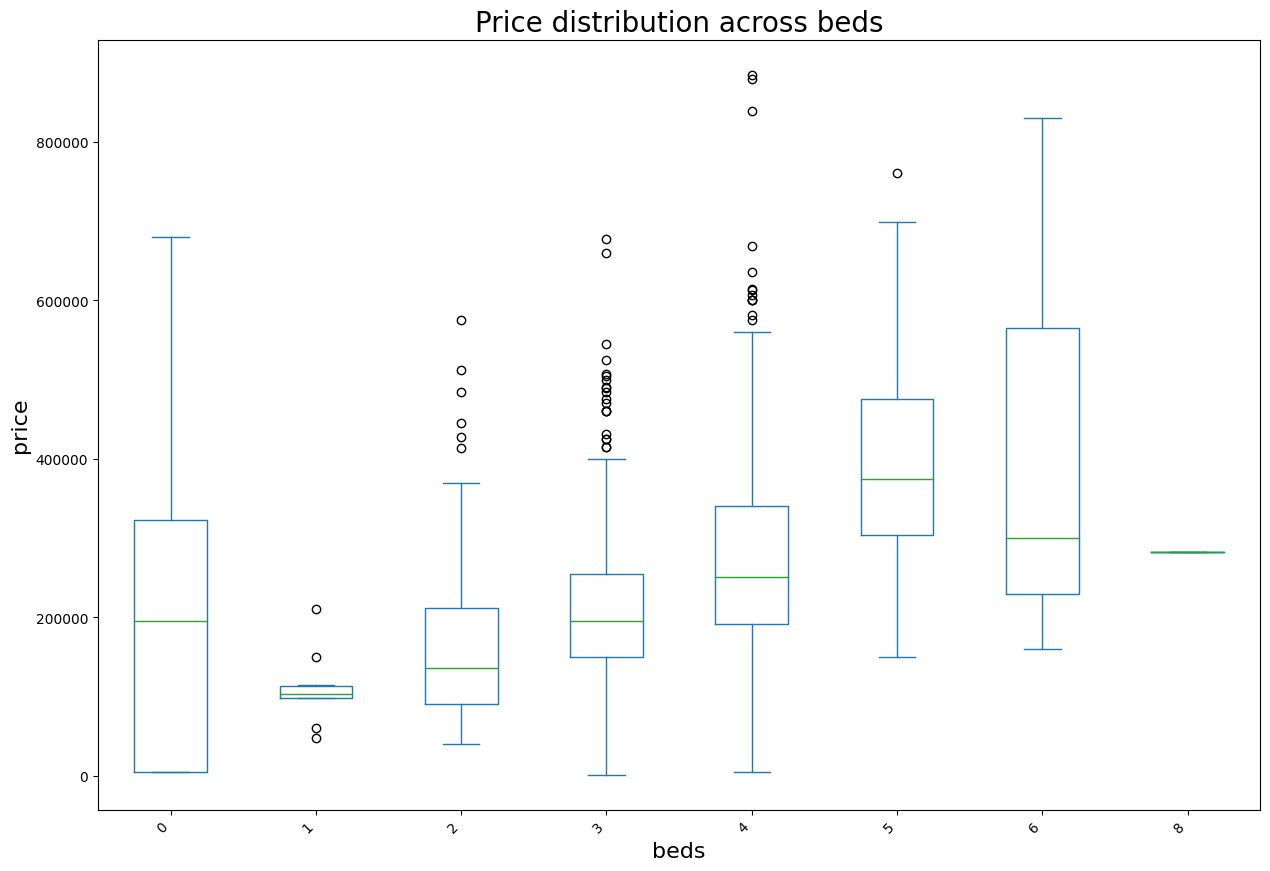

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('beds', ax)

<AxesSubplot: title={'center': 'Price distribution across baths'}, xlabel='baths', ylabel='price'>

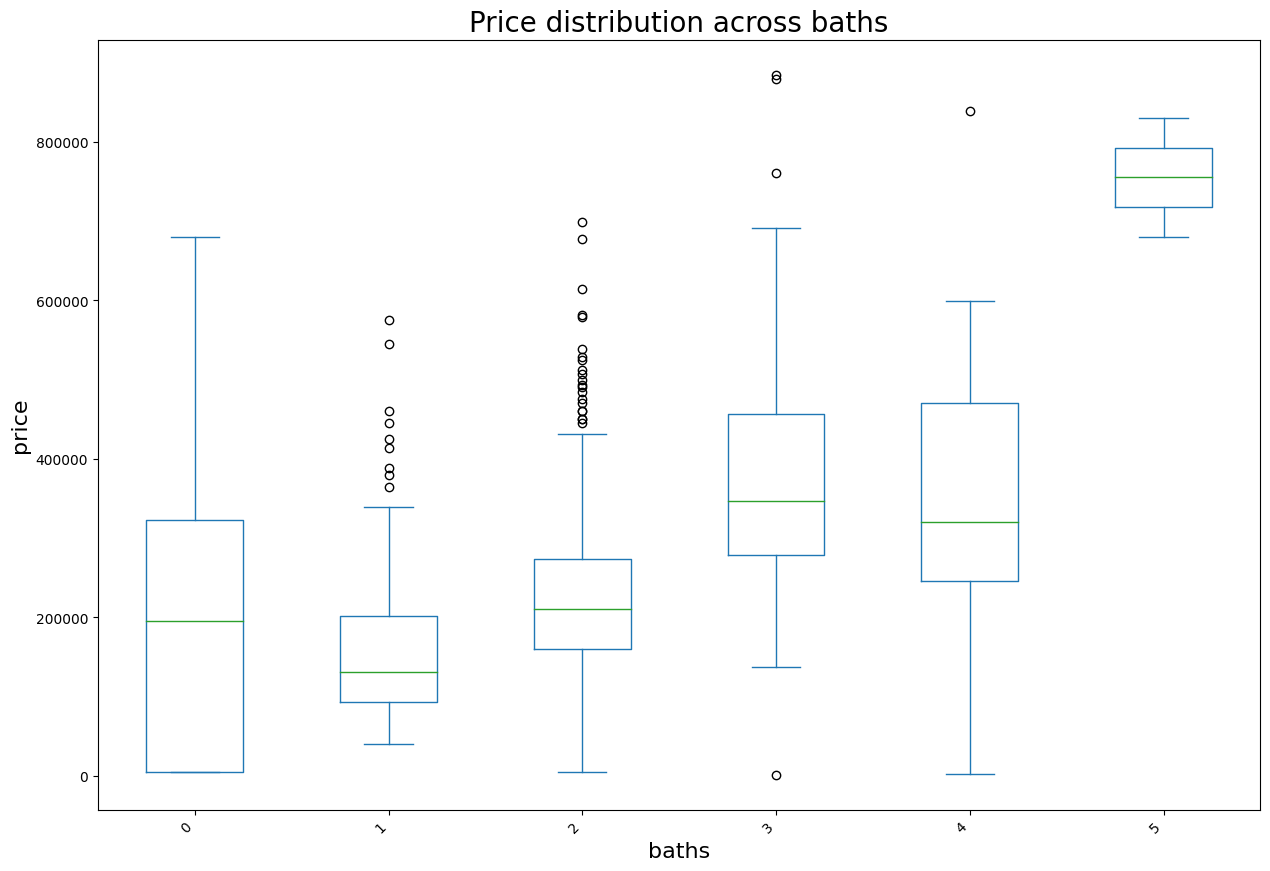

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('baths', ax)

<AxesSubplot: title={'center': 'Price distribution across type'}, xlabel='type', ylabel='price'>

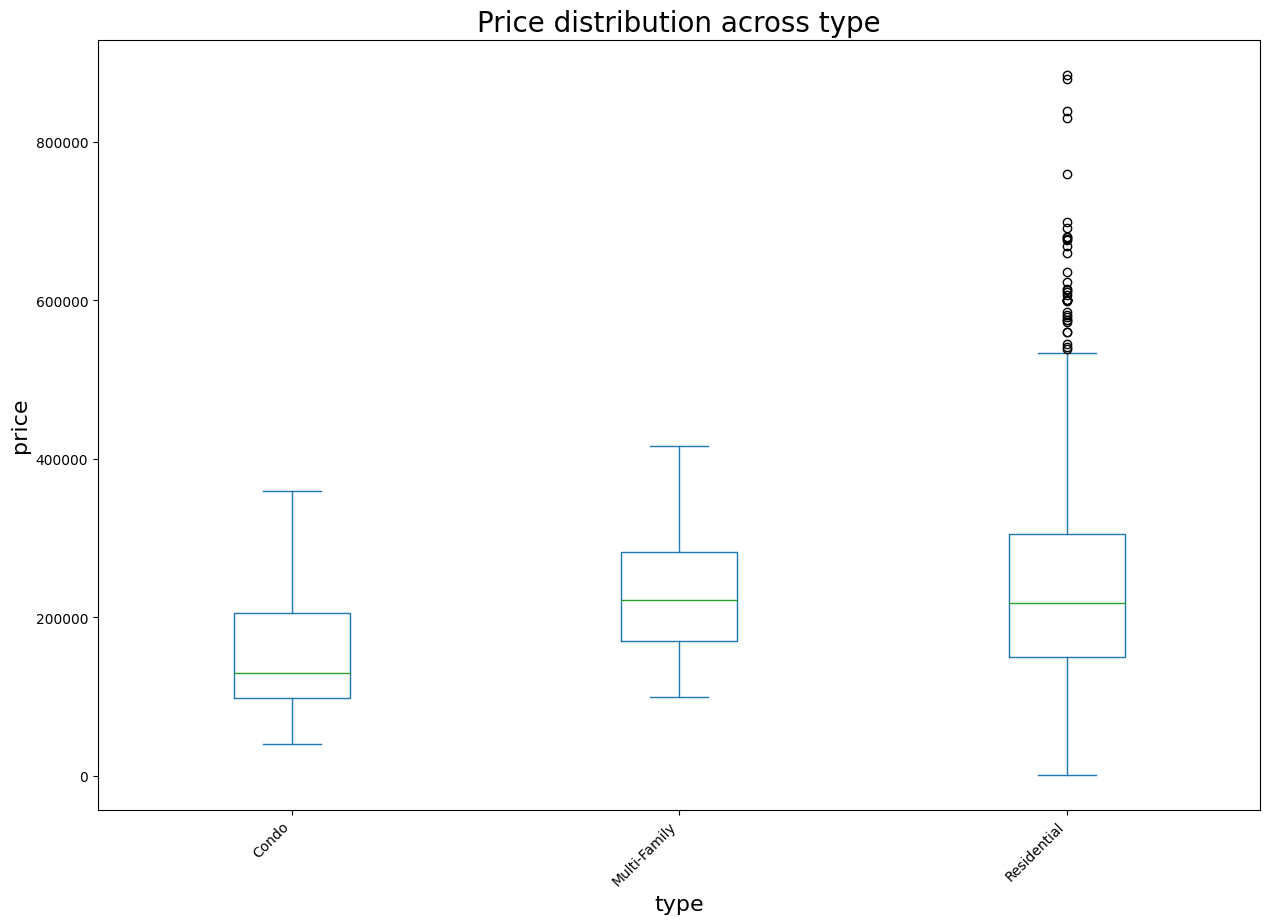

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('type', ax)

<AxesSubplot: title={'center': 'Price distribution across street_type'}, xlabel='street_type', ylabel='price'>

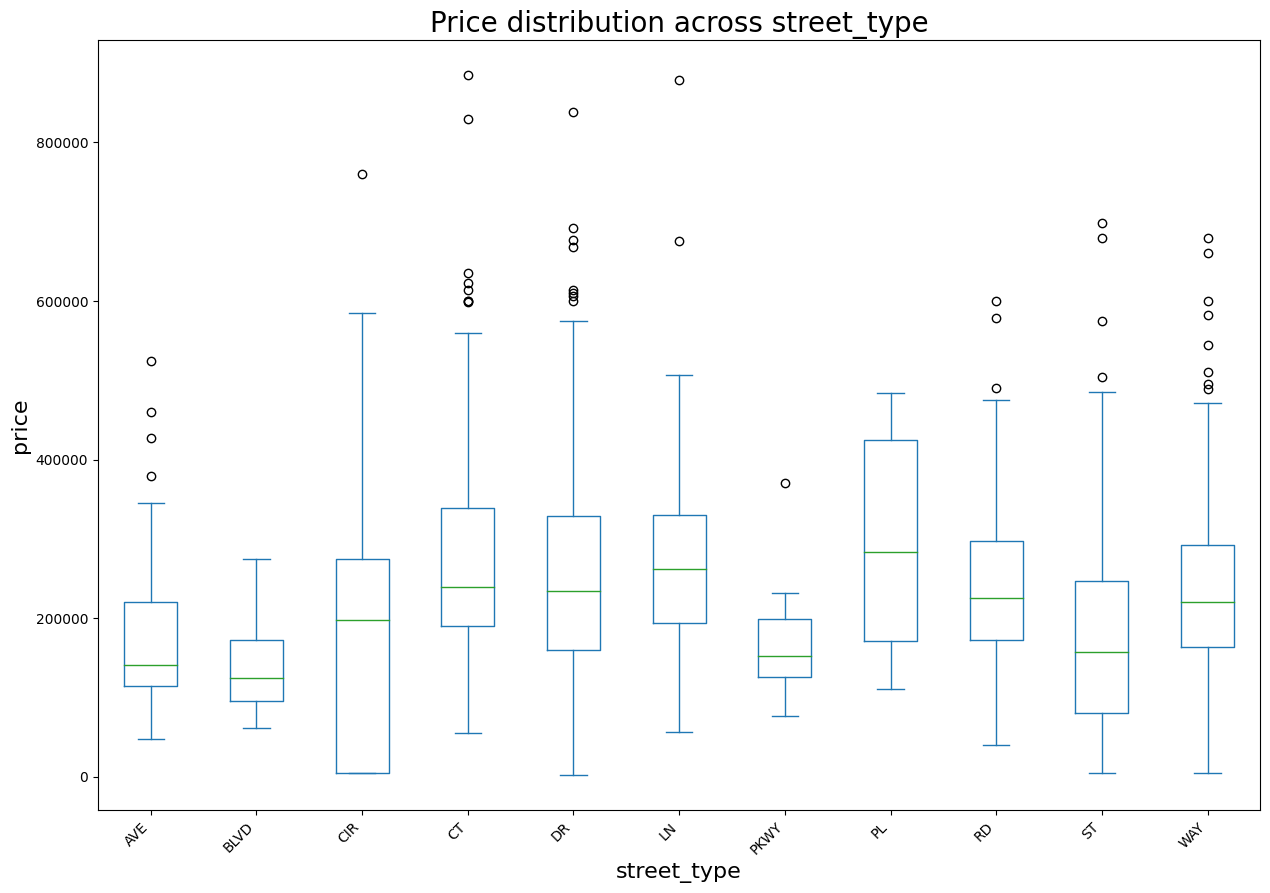

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))

make_box_plot_price('street_type', ax)

d. A predictive categorical independent variable will have different distributions of the 
output variable for each categorical value.  Create a table in which you describe each 
categorical independent variable as predictive or not.

| Variable     |   Predictiveness    |
|--------------|:-------------------:|
| street_type  |        low  (6)     |
| type         |        low  (5)     | --> Residential has a lot more outliers though
| baths        |        high (1)     |
| beds         |        high (2)     |
| zip          |        med  (4)     |
| state        |        NA   (7)     |
| city         |        med  (3)     |

Beds and Baths both have a pretty linear relationship with price. The more beds / baths there are the more expensive the house is. City and zip have similar predictability. I rated city higher simply because it has less categories, this can make it easier to use and is a higher level abstraction of zip code. Type and street_type have similar predictability as well, both have low correlation with the target variable. However, one can clearly see that condo has a lower mean then the others and therefore I rated that one higher in predictability.    





## Part 2: Classification on Property Type

a. For each continuous variable, create a box plot of the continuous variable versus property type. Make sure to put the property type on the horizontal axis and the continuous variable on the vertical axis.

In [64]:
sac_df['type'].value_counts()

Residential     917
Condo            54
Multi-Family     13
Name: type, dtype: int64

very inbalanced data set in terms of housing "type". 

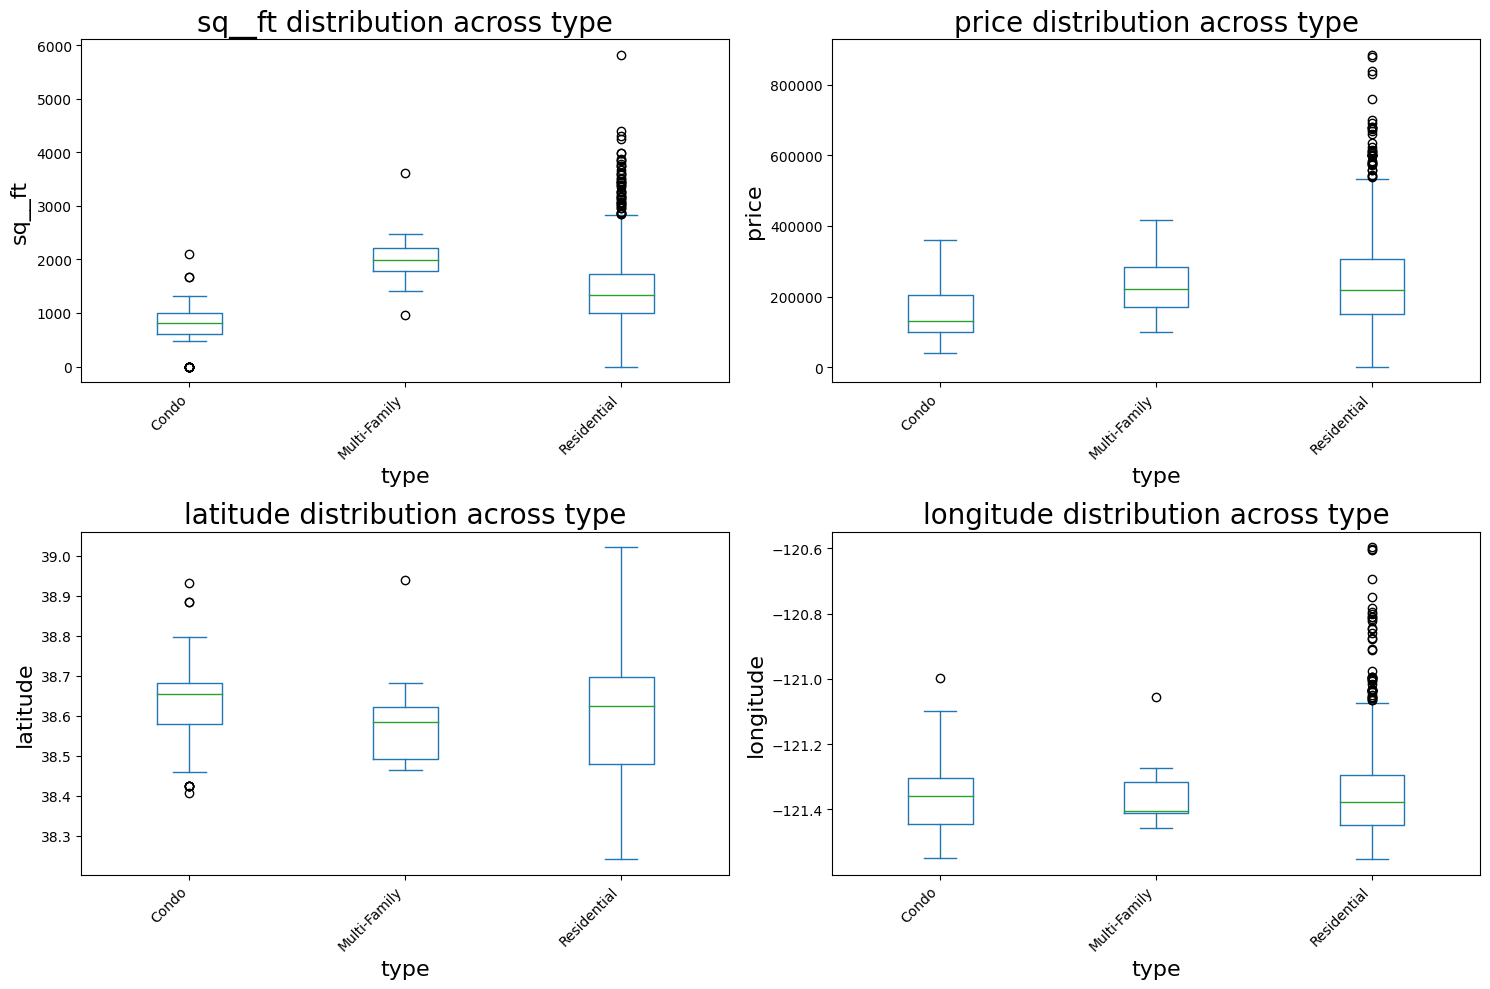

In [65]:
def make_box_plot_prop_type(col, ax):
    
    sac_df.plot(kind='box', column=col, by='type', ax=ax)
    # the output it was giving was very annoying so put a anonymous value
    _ =ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    make_pretty(ax, f'{col} distribution across type', 'type', col)
    return ax

fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
make_box_plot_prop_type('sq__ft', ax[0,0])
make_box_plot_prop_type('price', ax[0,1])
make_box_plot_prop_type('latitude', ax[1,0])
make_box_plot_prop_type('longitude', ax[1,1])
plt.tight_layout()

b. A predictive continuous independent variable will have different distributions of the for each categorical output value. Create a table in which you list describe each continuous independent variable as predictive or not.

| Variable     |   Predictiveness    |
|--------------|:-------------------:|
| sq__ft       |        high (1)     |
| price        |        low  (2)     | 
| latitude     |        low  (4)     |
| longitude    |        low  (3)     |


Sq__ft has a clear distribution across property types. Condos and multi-family have a very tight distribution, making it a very good predictor for property type. Price varies slightly across types. Residential is a little bit all over the place in every independent variable. Latitude and longitude have little to no correlation with the target variable. However multi-family has a very tight distribution making it a little more useful than latitude. 

c. For each categorical variable, create a heat map of the counts of each categorical variable value for each property type

<AxesSubplot: title={'center': 'Heatmap city distribution across type'}, xlabel='type', ylabel='city'>

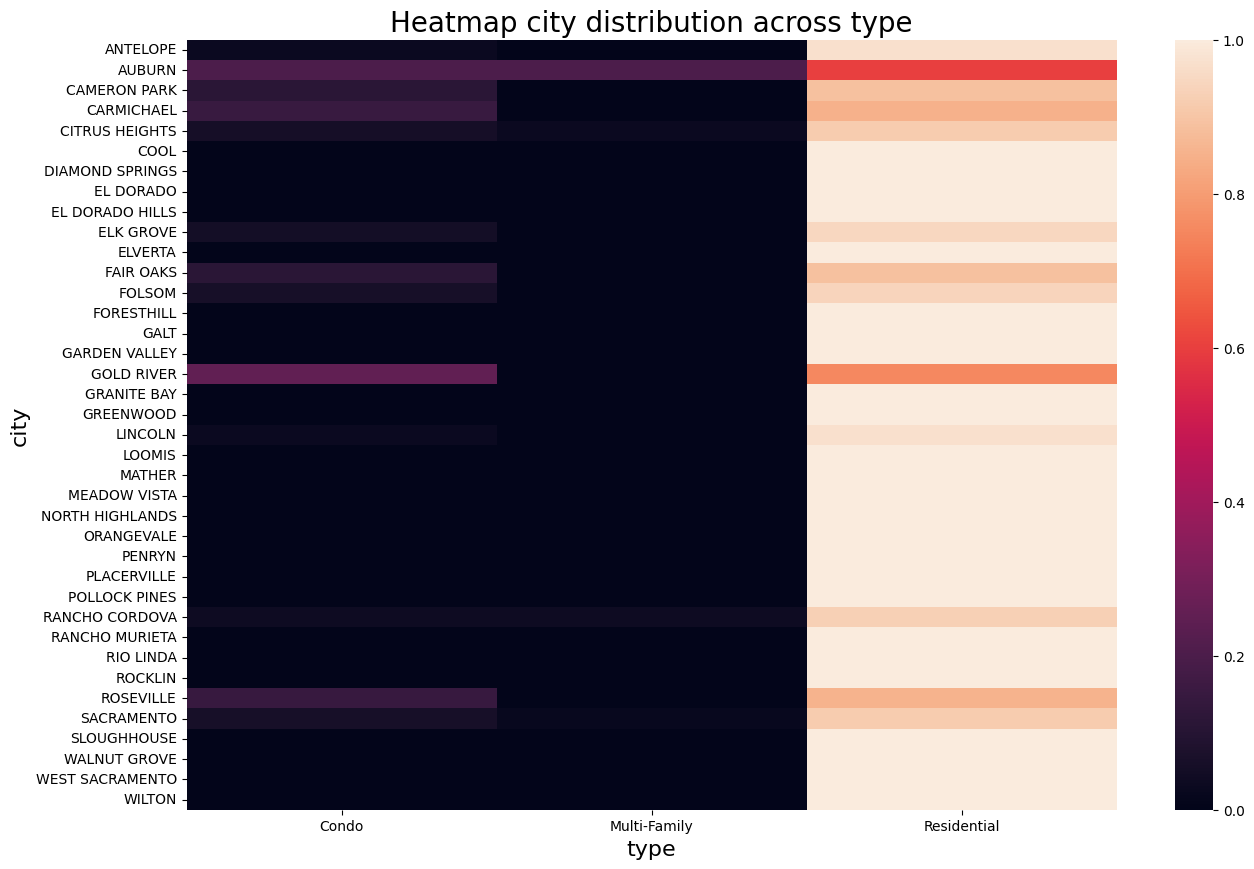

In [66]:

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['city'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap city distribution across type', 'type', 'city')

Most cities in the dataset only contain Residential property types. Auburn, Gold River and Roseville are exceptions to this rule. 

<AxesSubplot: title={'center': 'Heatmap state distribution across type'}, xlabel='type', ylabel='state'>

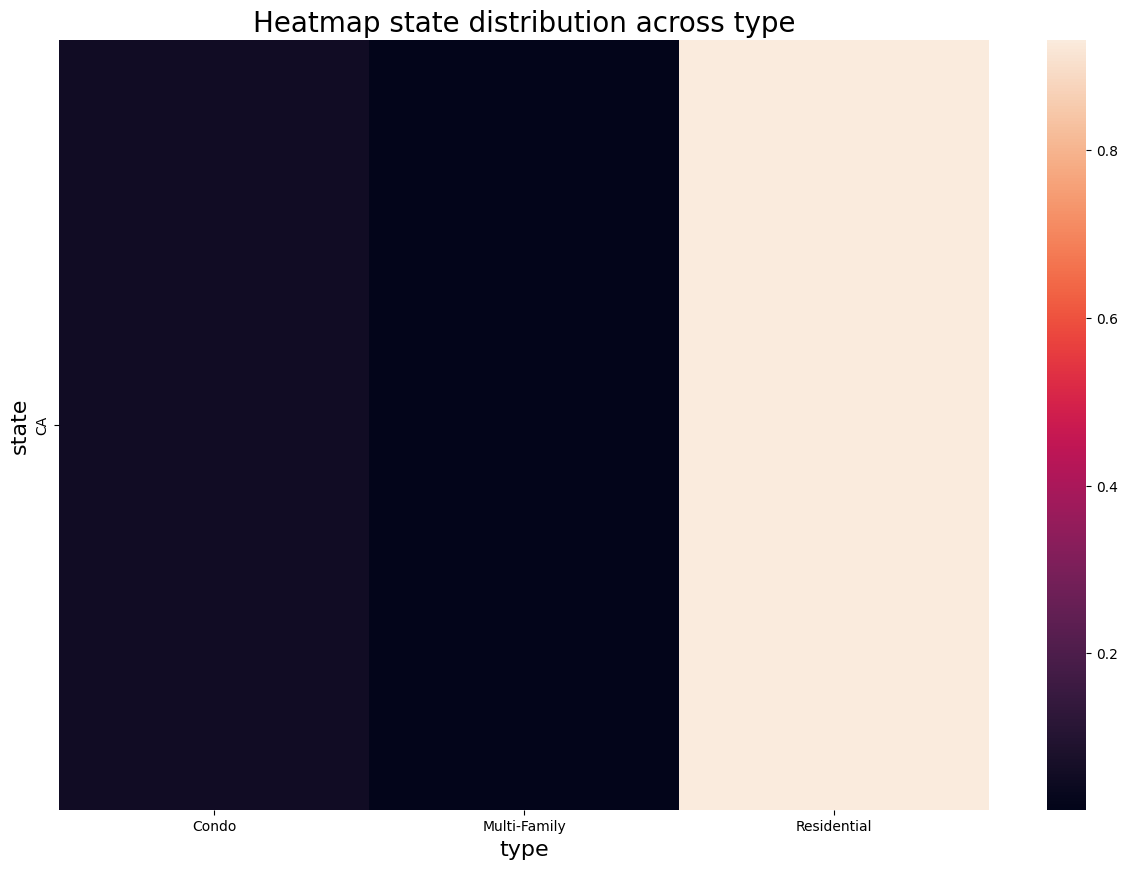

In [67]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['state'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap state distribution across type', 'type', 'state')

<AxesSubplot: title={'center': 'Heatmap city distribution across type'}, xlabel='type', ylabel='city'>

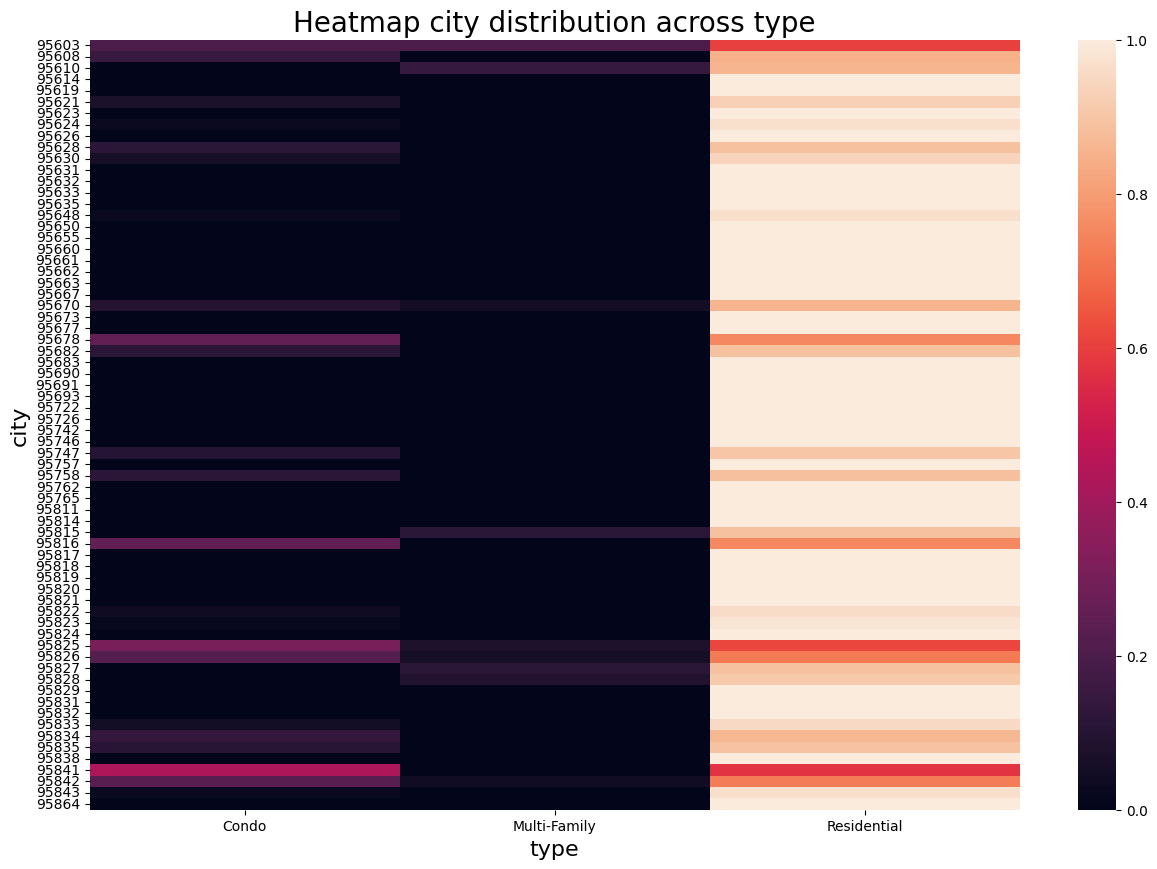

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['zip'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap city distribution across type', 'type', 'city')

<AxesSubplot: title={'center': 'Heatmap beds distribution across type'}, xlabel='type', ylabel='beds'>

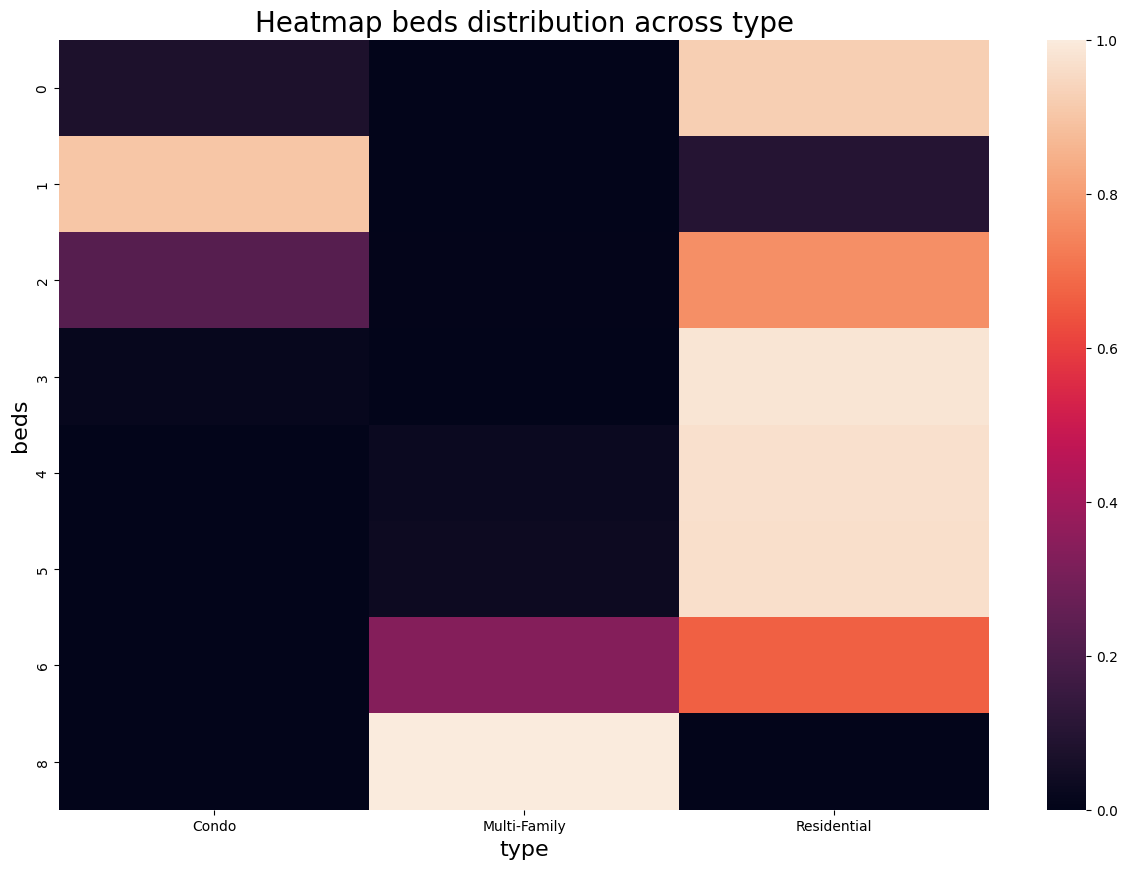

In [69]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['beds'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap beds distribution across type', 'type', 'beds')

<AxesSubplot: title={'center': 'Heatmap baths distribution across type'}, xlabel='type', ylabel='baths'>

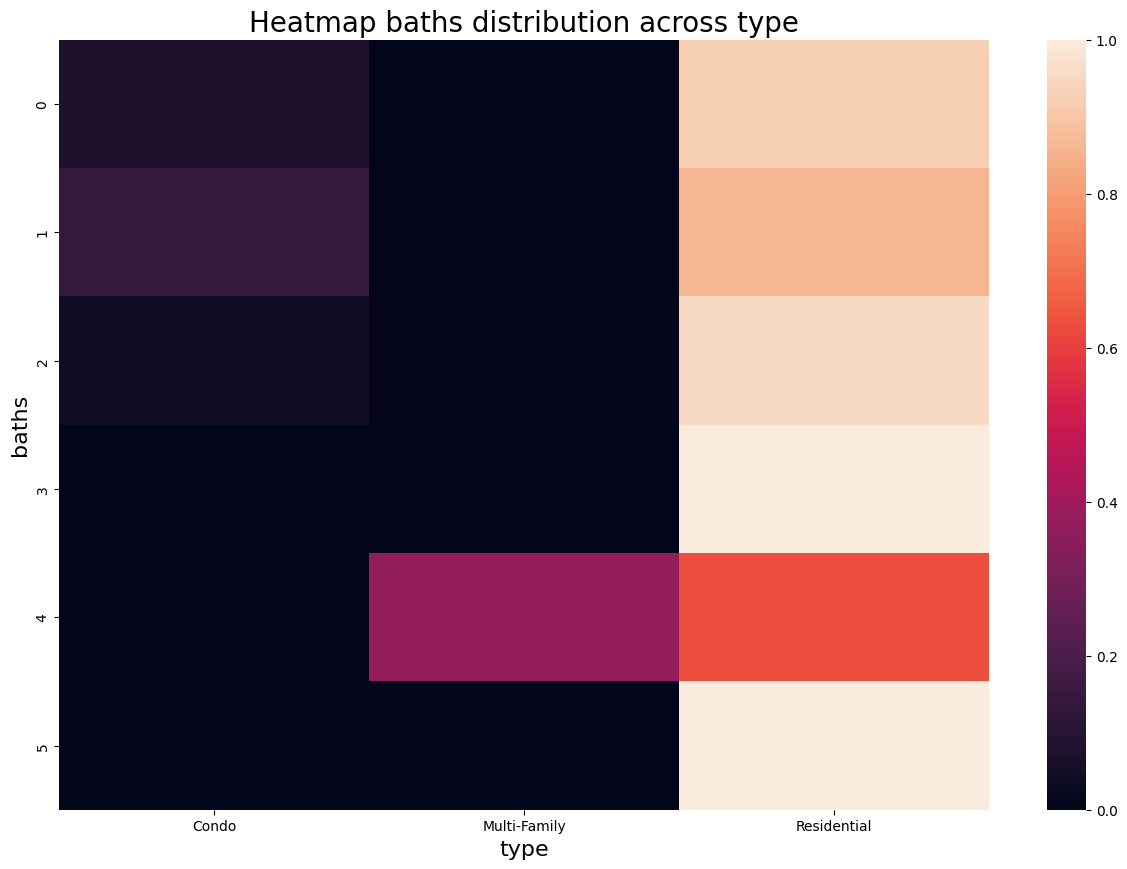

In [70]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['baths'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap baths distribution across type', 'type', 'baths')

<AxesSubplot: title={'center': 'Heatmap street_type distribution across type'}, xlabel='type', ylabel='street_type'>

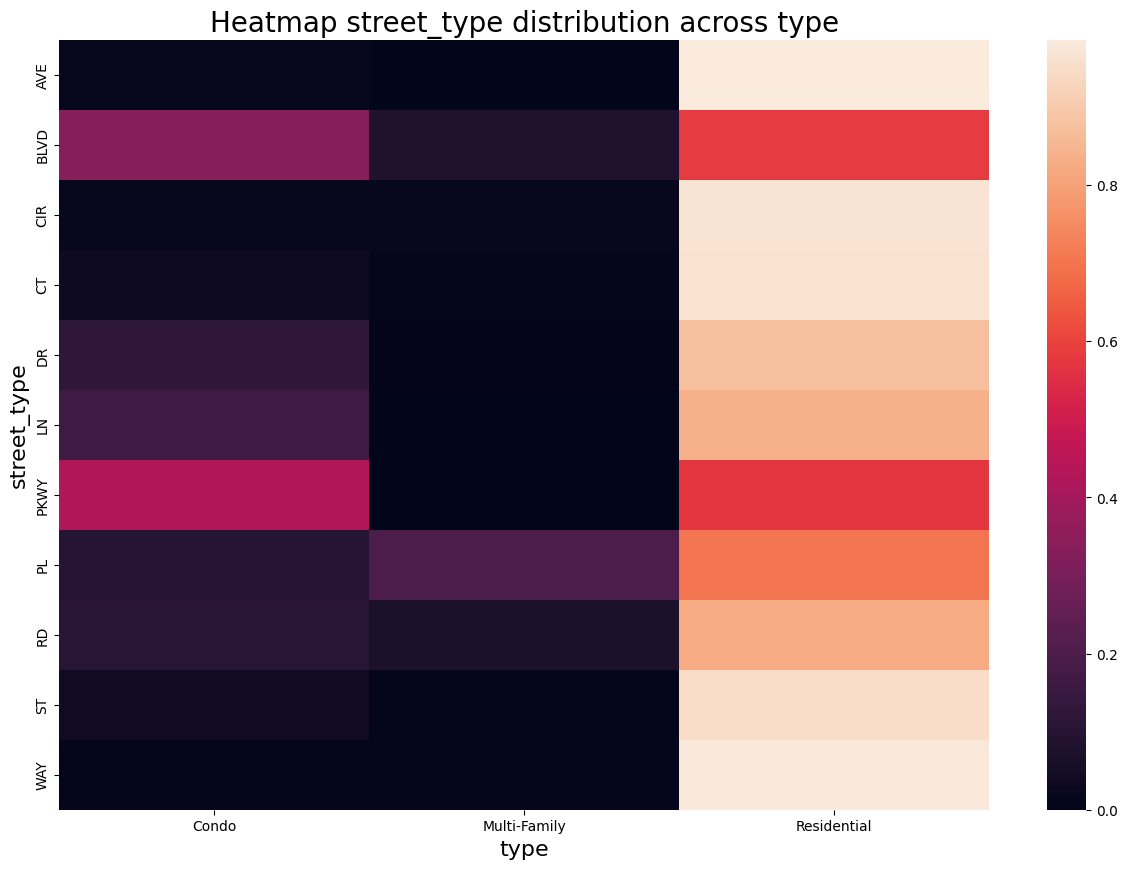

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['street_type'], sac_df['type'], normalize='index'), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap street_type distribution across type', 'type', 'street_type')

<AxesSubplot: title={'center': 'Heatmap empty_lot distribution across type'}, xlabel='type', ylabel='empty_lot'>

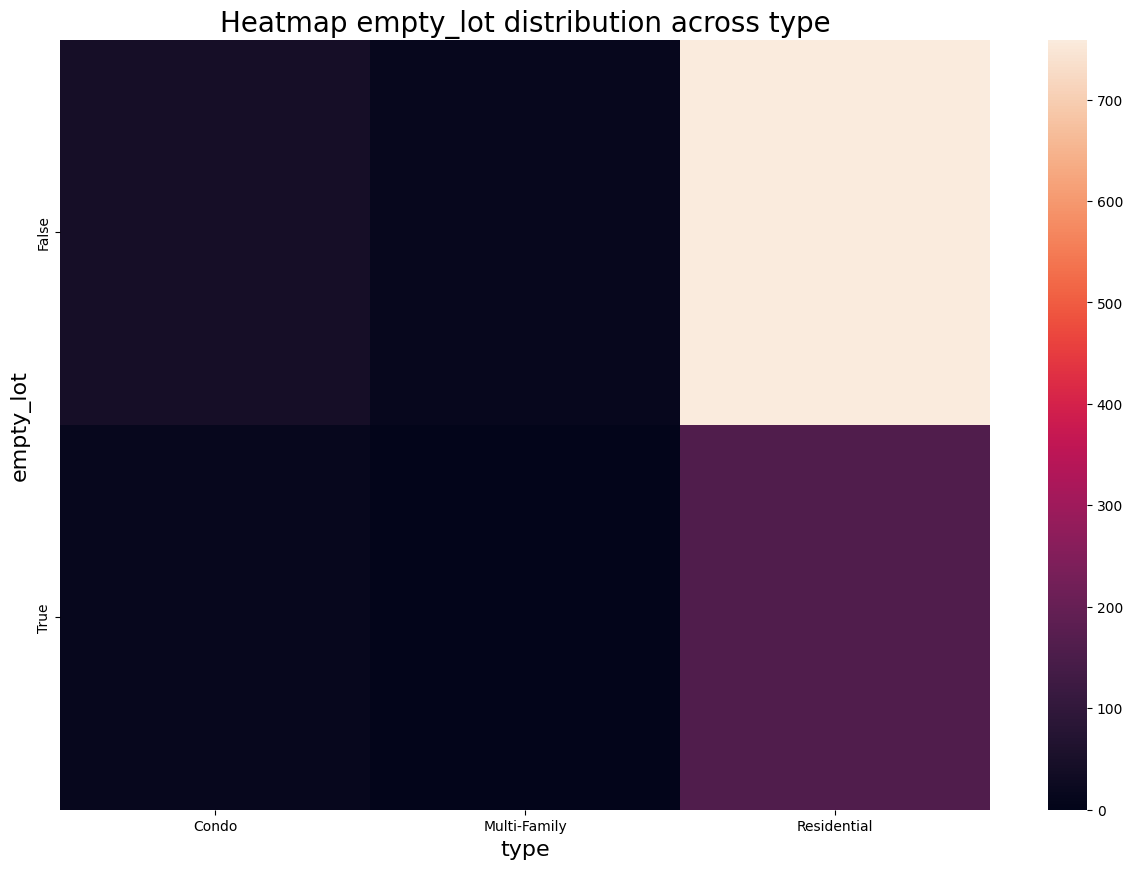

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(pd.crosstab(sac_df['empty_lot'], sac_df['type']), xticklabels=True, yticklabels=True, ax=ax)
make_pretty(ax, 'Heatmap empty_lot distribution across type', 'type', 'empty_lot')

d. A categorical variable is predictive if each value occurs frequently with one value of the output variable.  Create a table in which you describe each categorical independent variable as predictive or not.

| Variable     |   Predictiveness    |
|--------------|:-------------------:|
| street_type  |        low  (6)     |
| baths        |        high (1)     |
| beds         |        high (2)     |
| zip          |        med  (4)     |
| state        |        NA   (7)     |
| city         |        med  (3)     |
| empty_lot    |        low  (5)     |


Beds is a very good predictor of Type, especially for multi-family. Baths have some very pure rows, (3 and 5). Multi-family commonly has 4 baths (most likely because each family gets 2 baths). Beds has the same feature. Street_type has some streets where if it is ave for example it is definitely residential (this probably has to do with zoning permissions). Zip and city have many zip codes that are purely residential. street_type has low correlation with the target variable.    


### Part 3: Compare predictive variables

a. Make a Venn diagram of the variables you described as predictive. 


![Venn diagram lab 2](Data/Venn.jpg)


b. How many variables are predictive for both problems?    

- There are three variables that are predictive for both problems. (beds, baths and sq__ft)
 
c. Create a table with an explanation as to why you think each variable would be 
predictive of both or only one problem.

| Variable     |   Predictiveness for price   |  Predictiveness for type   |
|--------------|:----------------------------:|:---------------------------|
| sq__ft       |        high (3)              |         high (3)           |
| baths        |        high (1)              |         med (5)            |
| beds         |        high (2)              |         high (2)           |
| zip          |        low  (5)              |         med (4)            |
| price        |        NA   (7)              |         high (1)           |
| longitude    |        med  (4)              |         low (6)            |
| type         |        med  (6)              |         NA (7)             |

Beds, Baths and sq__ft are all good predictors of both. This is likely because if there are many beds and baths the price is likely more. Furthermore, if a sample has low numbers of beds and baths, it is more likely to be a condo, if there are lots of beds and baths it is more likely residential. Since beds and baths are correlated with both target variables, it only makes logical sense that sq__ft would be correlated as well, because if you have more beds and baths you need to have more space to put them so you need more sq__ft. Longitude is predictive for price, however for type it is not predictive. The more east you go (greater latitude) the more pricier the sample is. However longitude does not predict for type, so these areas to the east are also mixed. Zip is predictive for type but not price, because there are some zip codes that are purely residential, however just because a zip code is purely residential does not predict the price for that zip code. Price is very predictive for price, and is not applicable to itself. Type is somewhat predictive for price, and not applicable to itself. 


In [73]:
sac_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [74]:
def convert_type(x):
    if x == 'Residential':
        return 1
    elif x == 'Condo':
        return 0.5
    elif x == 'Multi-Family':
        return 0
sac_df['type'] = sac_df['type'].map(convert_type)

sac_df.corr()

C:\Users\paganinik\AppData\Local\Temp\ipykernel_9096\3451151231.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sac_df.corr()


,zip,beds,baths,sq__ft,type,price,latitude,longitude,empty_lot
zip,1.000000,0.123845,0.067695,0.129042,-0.040823,-0.093145,-0.290293,-0.540461,-0.275598
beds,0.123845,1.000000,0.838951,0.683099,0.066560,0.343575,-0.291495,-0.046721,-0.553223
baths,0.067695,0.838951,1.000000,0.664714,-0.016894,0.417660,-0.235776,0.023596,-0.446254
sq__ft,0.129042,0.683099,0.664714,1.000000,0.041326,0.334780,-0.383364,-0.173660,-0.705998
type,-0.040823,0.066560,-0.016894,0.041326,1.000000,0.110548,-0.031378,0.009171,0.015396
price,-0.093145,0.343575,0.417660,0.334780,0.110548,1.000000,-0.039650,0.285146,0.073610
latitude,-0.290293,-0.291495,-0.235776,-0.383364,-0.031378,-0.039650,1.000000,0.389364,0.461209
longitude,-0.540461,-0.046721,0.023596,-0.173660,0.009171,0.285146,0.389364,1.000000,0.353837
empty_lot,-0.275598,-0.553223,-0.446254,-0.705998,0.015396,0.073610,0.461209,0.353837,1.000000


Predictive for price: baths, beds, sq__ft, longitude     
Not so predictive for price: zip, latitude, empty_lot, type     

Predictive for type: price, beds, sq__ft, baths, zip     
Not so predictive for type: longitude, latitude, empty_lot      

### A cool map of housing prices in sacramento

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


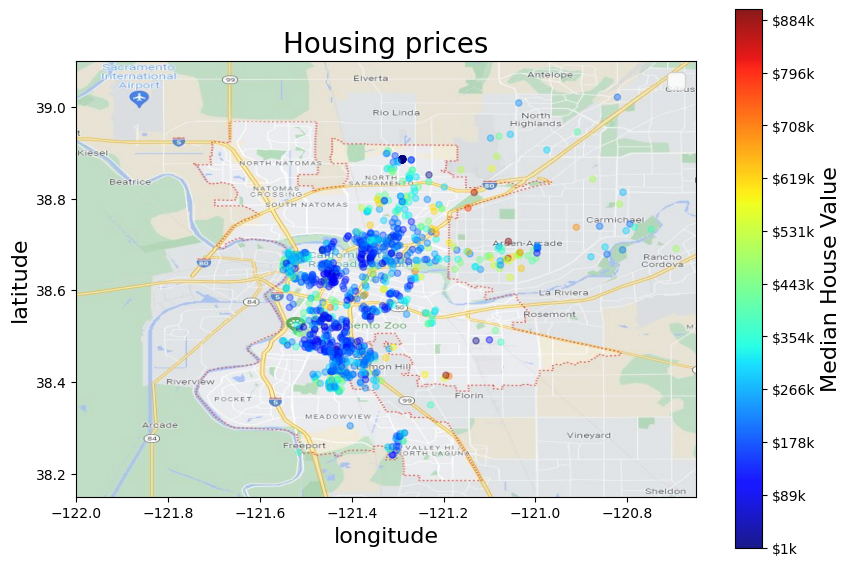

In [75]:
import matplotlib.image as mpimg
images_path = os.path.join('Data','sac_map2.jpg')

california_img=mpimg.imread(images_path)
ax = sac_df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  c="price", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-122, -120.65, 38.15, 39.1], alpha=0.9,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = sac_df["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values*250/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v) / 1000) for v in tick_values], fontsize=10)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
make_pretty(ax, 'Housing prices', 'longitude', 'latitude')
plt.show()


can't get the map perfectly but its ok